*Read sections 4.1 - 4.3 of the book before using these notes.*

*Note that in this course, lecture notes are not sufficient, you must read the book for better understanding. Lecture notes are just implementing the concepts of the book on a dataset, but not explaining the concepts elaborately.*

## Theory Behind Logistic Regression

Logistic regression is the go-to linear classification algorithm for two-class problems. It is easy to implement, easy to understand and gets great results on a wide variety of problems, even when the expectations the method has for your data are violated.

### Description

Logistic regression is named for the function used at the core of the method, the [logistic function](https://en.wikipedia.org/wiki/Logistic_function).

The logistic function, also called the **`Sigmoid function`** was developed by statisticians to describe properties of population growth in ecology, rising quickly and maxing out at the carrying capacity of the environment. It’s an S-shaped curve that can take any real-valued number and map it into a value between 0 and 1, but never exactly at those limits.

$$\frac{1}{1 + e^{-x}}$$

$e$ is the base of the natural logarithms and $x$ is value that you want to transform via the logistic function.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm
from sklearn.metrics import precision_recall_curve, roc_curve, auc, accuracy_score
from sklearn.linear_model import LogisticRegression

Text(0.5, 1.0, 'Sigmoid Function')

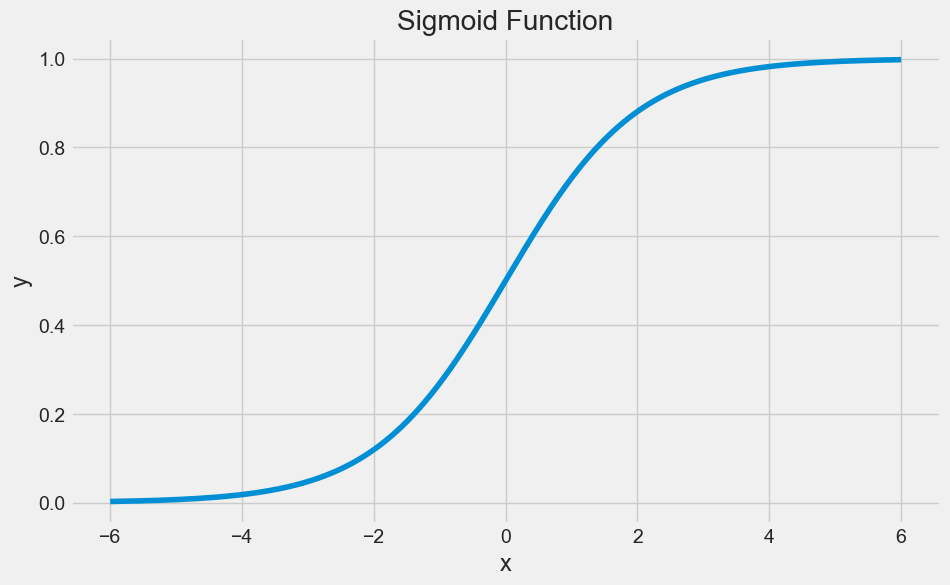

In [2]:
%matplotlib inline
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
x = np.linspace(-6, 6, num=1000)
plt.figure(figsize=(10, 6))
plt.plot(x, (1 / (1 + np.exp(-x))))
plt.xlabel("x")
plt.ylabel("y")
plt.title("Sigmoid Function")

The logistic regression equation has a very similar representation like linear regression. The difference is that the output value being modelled is binary in nature.

$$\hat{p}=\frac{e^{\hat{\beta_0}+\hat{\beta_1}x_1}}{1+e^{\hat{\beta_0}+\hat{\beta_1}x_1}}$$

or

$$\hat{p}=\frac{1.0}{1.0+e^{-(\hat{\beta_0}+\hat{\beta_1}x_1)}}$$

$\hat{\beta_0}$ is the estimated intercept term

$\hat{\beta_1}$ is the estimated coefficient for $x_1$

$\hat{p}$ is the predicted output with real value between 0 and 1. To convert this to binary output of 0 or 1, this would either need to be rounded to an integer value or a cutoff point be provided to specify the class segregation point.

### Learning the Logistic Regression Model

The coefficients (Beta values b) of the logistic regression algorithm must be estimated from your training data. This is done using [maximum-likelihood estimation](https://en.wikipedia.org/wiki/Maximum_likelihood_estimation).

Maximum-likelihood estimation is a common learning algorithm used by a variety of machine learning algorithms, although it does make assumptions about the distribution of your data (more on this when we talk about preparing your data).

The best coefficients should result in a model that would predict a value very close to 1 (e.g. male) for the default class and a value very close to 0 (e.g. female) for the other class. The intuition for maximum-likelihood for logistic regression is that a search procedure seeks values for the coefficients (Beta values) that maximize the likelihood of the observed data. In other words, in MLE, we estimate the parameter values (Beta values) which are the most likely to produce that data at hand.

Here is an analogy to understand the idea behind Maximum Likelihood Estimation (MLE). Let us say, you are listening to a song (data). You are not aware of the singer (parameter) of the song. With just the musical piece at hand, you try to guess the singer (parameter) who you feel is the most likely (MLE) to have sung that song. Your are making a maximum likelihood estimate! Out of all the singers (parameter space) you have chosen them as the one who is the most likely to have sung that song (data).

We are not going to go into the math of maximum likelihood. It is enough to say that a minimization algorithm is used to optimize the best values for the coefficients for your training data. This is often implemented in practice using efficient numerical optimization algorithm (like the Quasi-newton method).

When you are learning logistic, you can implement it yourself from scratch using the much simpler gradient descent algorithm.

### Preparing Data for Logistic Regression
The assumptions made by logistic regression about the distribution and relationships in your data are much the same as the assumptions made in linear regression.

Much study has gone into defining these assumptions and precise probabilistic and statistical language is used. My advice is to use these as guidelines or rules of thumb and experiment with different data preparation schemes.

Ultimately in predictive modeling machine learning projects you are laser focused on making accurate predictions rather than interpreting the results. As such, you can break some assumptions as long as the model is robust and performs well.

- **Binary Output Variable:** This might be obvious as we have already mentioned it, but logistic regression is intended for binary (two-class) classification problems. It will predict the probability of an instance belonging to the default class, which can be snapped into a 0 or 1 classification.
- **Remove Noise:** Logistic regression assumes no error in the output variable (y), consider removing outliers and possibly misclassified instances from your training data.
- **Gaussian Distribution:** Logistic regression is a linear algorithm (with a non-linear transform on output). It does assume a linear relationship between the input variables with the output. Data transforms of your input variables that better expose this linear relationship can result in a more accurate model. For example, you can use log, root, Box-Cox and other univariate transforms to better expose this relationship.
- **Remove Correlated Inputs:** Like linear regression, the model can overfit if you have multiple highly-correlated inputs. Consider calculating the pairwise correlations between all inputs and removing highly correlated inputs.
- **Fail to Converge:** It is possible for the expected likelihood estimation process that learns the coefficients to fail to converge. This can happen if there are many highly correlated inputs in your data or the data is very sparse (e.g. lots of zeros in your input data).

## Logistic Regression: Scikit-learn vs Statsmodels
Python gives us two ways to do logistic regression. Statsmodels offers modeling from the perspective of statistics. Scikit-learn offers some of the same models from the perspective of machine learning.

So we need to understand the difference between statistics and machine learning! Statistics makes mathematically valid inferences about a population based on sample data. Statistics answers the question, “What is the evidence that X is related to Y?” Machine learning has the goal of optimizing predictive accuracy rather than inference. Machine learning answers the question, “Given X, what prediction should we make for Y?”

## Training a logistic regression model

Read the data on social network ads. The data shows if the person purchased a product when targeted with an ad on social media. Fit a logistic regression model to predict if a user will purchase the product based on their characteristics such as age, gender and estimated salary.

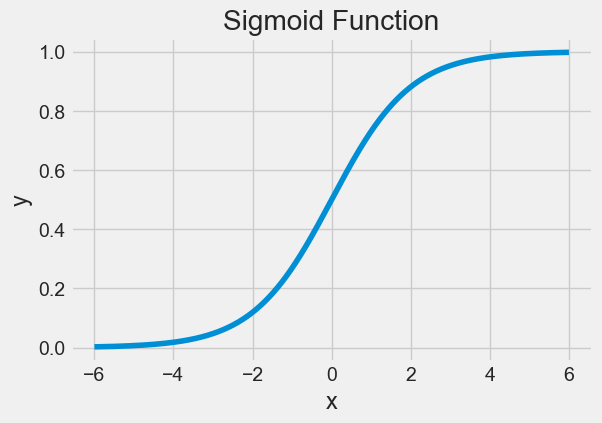

In [3]:
%matplotlib inline
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
x = np.linspace(-6, 6, num=1000)
plt.figure(figsize=(6, 4))
plt.plot(x, (1 / (1 + np.exp(-x))))
plt.xlabel("x")
plt.ylabel("y")
plt.title("Sigmoid Function");

## Logistic Regression: Scikit-learn vs Statsmodels
Python gives us two ways to do logistic regression. Statsmodels offers modeling from the perspective of statistics. Scikit-learn offers some of the same models from the perspective of machine learning.

So we need to understand the difference between statistics and machine learning! Statistics makes mathematically valid inferences about a population based on sample data. Statistics answers the question, “What is the evidence that X is related to Y?” Machine learning has the goal of optimizing predictive accuracy rather than inference. Machine learning answers the question, “Given X, what prediction should we make for Y?”

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm
from sklearn.metrics import precision_recall_curve, roc_curve, auc, accuracy_score
from sklearn.linear_model import LogisticRegression

Read the data on social network ads. The data shows if the person purchased a product when targeted with an ad on social media. Fit a logistic regression model to predict if a user will purchase the product based on their characteristics such as age, gender and estimated salary.

In [5]:
train = pd.read_csv('./Datasets/Social_Network_Ads_train.csv') #Develop the model on train data
test = pd.read_csv('./Datasets/Social_Network_Ads_test.csv') #Test the model on test data

In [6]:
train.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15755018,Male,36,33000,0
1,15697020,Female,39,61000,0
2,15796351,Male,36,118000,1
3,15665760,Male,39,122000,1
4,15794661,Female,26,118000,0


### Examining the Distribution of the Target Column, make sure our target is not severely imbalanced

In [7]:
train.Purchased.value_counts()

Purchased
0    194
1    106
Name: count, dtype: int64

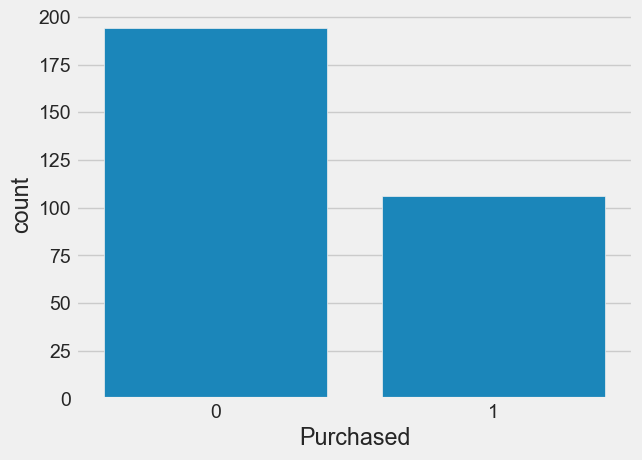

In [8]:
sns.countplot(x = 'Purchased',data = train);

### Fitting a linear regression

<Axes: xlabel='Age', ylabel='Purchased'>

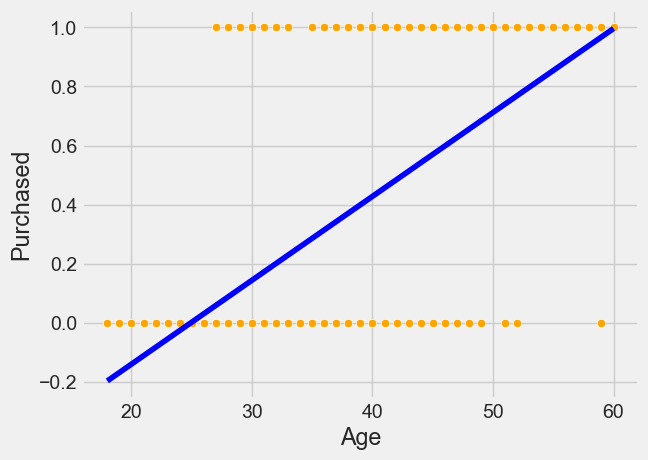

In [9]:
sns.scatterplot(x = 'Age', y = 'Purchased', data = train, color = 'orange') #Visualizing data
lm = sm.ols(formula = 'Purchased~Age', data = train).fit() #Developing linear regression model
sns.lineplot(x = 'Age', y= lm.predict(train), data = train, color = 'blue') #Visualizing model

### Logistic Regression with Statsmodel

Optimization terminated successfully.
         Current function value: 0.430107
         Iterations 7


<Axes: xlabel='Age', ylabel='Purchased'>

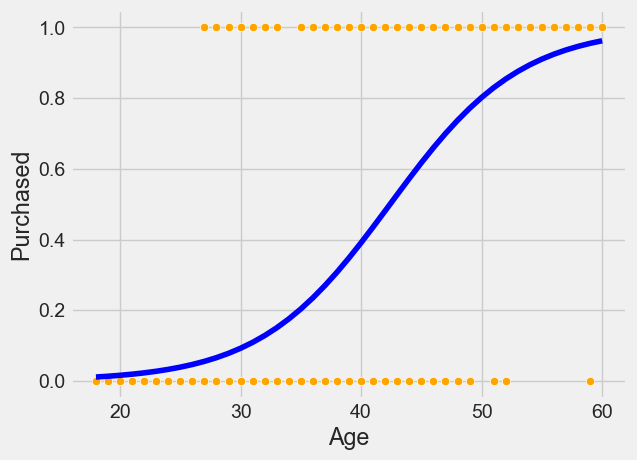

In [10]:
sns.scatterplot(x = 'Age', y = 'Purchased', data = train, color = 'orange') #Visualizing data
logit_model = sm.logit(formula = 'Purchased~Age', data = train).fit() #Developing logistic regression model
sns.lineplot(x = 'Age', y= logit_model.predict(train), data = train, color = 'blue') #Visualizing model

In [11]:
logit_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Purchased   No. Observations:                  300
Model:                          Logit   Df Residuals:                      298
Method:                           MLE   Df Model:                            1
Date:                Sun, 09 Feb 2025   Pseudo R-squ.:                  0.3378
Time:                        18:28:20   Log-Likelihood:                -129.03
converged:                       True   LL-Null:                       -194.85
Covariance Type:            nonrobust   LLR p-value:                 1.805e-30
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -7.8102      0.885     -8.825      0.000      -9.545      -6.076
Age            0.1842      0.022      8.449      0.000       0.141       0.227
==============================================================================
"""

In [12]:
logit_model_gender = sm.logit(formula = 'Purchased~Gender', data = train).fit()
logit_model_gender.summary()

Optimization terminated successfully.
         Current function value: 0.648804
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Purchased   No. Observations:                  300
Model:                          Logit   Df Residuals:                      298
Method:                           MLE   Df Model:                            1
Date:                Sun, 09 Feb 2025   Pseudo R-squ.:                0.001049
Time:                        18:28:20   Log-Likelihood:                -194.64
converged:                       True   LL-Null:                       -194.85
Covariance Type:            nonrobust   LLR p-value:                    0.5225
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -0.5285      0.168     -3.137      0.002      -0.859      -0.198
Gender[T.Male]    -0.1546      0.242     -0.639      0.523      -0.629       0.319
==================================================================================
"""

In [13]:
# Predicted probabilities
predicted_probabilities = logit_model.predict(train)
predicted_probabilities

0      0.235159
1      0.348227
2      0.235159
3      0.348227
4      0.046473
         ...   
295    0.737081
296    0.481439
297    0.065810
298    0.829688
299    0.150336
Length: 300, dtype: float64

In [14]:
# Predicted classes (binary outcome, 0 or 1)
predicted_classes = (predicted_probabilities > 0.5).astype(int)
predicted_classes

0      0
1      0
2      0
3      0
4      0
      ..
295    1
296    0
297    0
298    1
299    0
Length: 300, dtype: int32

In [15]:
#Function to compute confusion matrix and prediction accuracy on training data
def confusion_matrix_train(model,cutoff=0.5):
    # Confusion matrix
    cm_df = pd.DataFrame(model.pred_table(threshold = cutoff))
    #Formatting the confusion matrix
    cm_df.columns = ['Predicted 0', 'Predicted 1'] 
    cm_df = cm_df.rename(index={0: 'Actual 0',1: 'Actual 1'})
    cm = np.array(cm_df)
    # Calculate the accuracy
    accuracy = (cm[0,0]+cm[1,1])/cm.sum()
    sns.heatmap(cm_df, annot=True, cmap='Blues', fmt='g')
    plt.ylabel("Actual Values")
    plt.xlabel("Predicted Values")
    print("Classification accuracy = {:.1%}".format(accuracy))

Classification accuracy = 83.3%


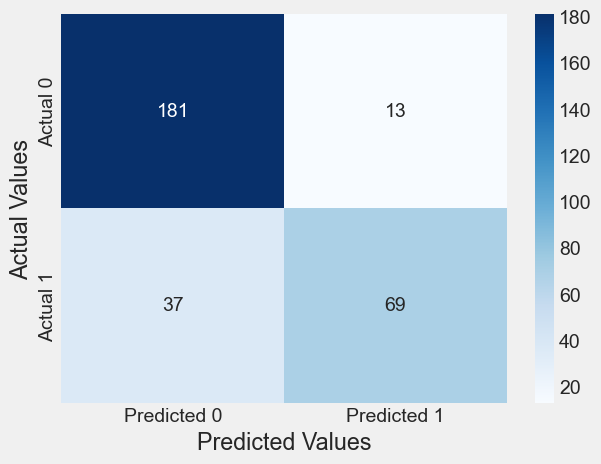

In [16]:
cm = confusion_matrix_train(logit_model)

Classification accuracy = 73.7%


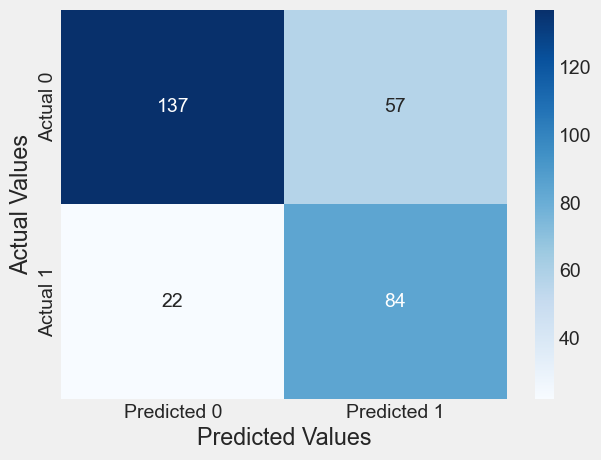

In [17]:
# change the cutoff to 0.3
cm = confusion_matrix_train(logit_model, 0.3)

Classification accuracy = 74.7%


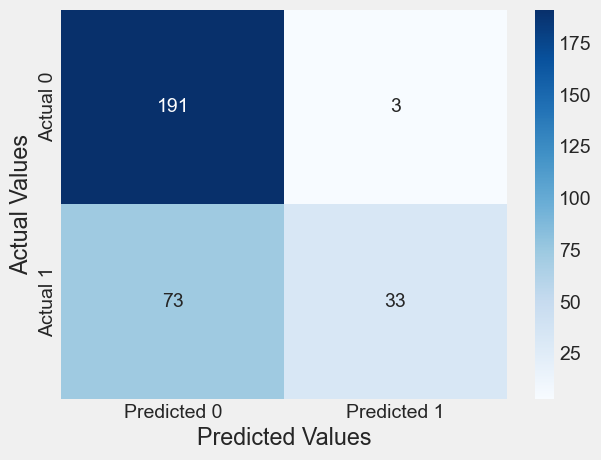

In [18]:
# increase the cutoff to 0.7
cm = confusion_matrix_train(logit_model, 0.8)

**Making prediction on test set and output the model's performance**

In [19]:
# Predicted probabilities
predicted_probabilities = logit_model.predict(test)

In [20]:
# Predicted classes (binary outcome, 0 or 1)
predicted_classes = (predicted_probabilities > 0.5).astype(int)
predicted_classes

0     0
1     0
2     0
3     0
4     0
     ..
95    1
96    1
97    1
98    0
99    1
Length: 100, dtype: int32

In [21]:
from sklearn.metrics import confusion_matrix

In [22]:
confusion_mat = confusion_matrix(test.Purchased, predicted_classes)
# Define labels for the confusion matrix
labels = ['Actual Negative', 'Actual Positive']
# Create a formatted confusion matrix
formatted_confusion_mat = pd.DataFrame(confusion_mat, index=labels, columns=[f'Predicted {label}' for label in labels])

print("Confusion Matrix:")
print(formatted_confusion_mat)

Confusion Matrix:
                 Predicted Actual Negative  Predicted Actual Positive
Actual Negative                         58                          5
Actual Positive                          9                         28


### Logistic Regression with Sklearn

In [23]:
X_train = train[['Age']]
y_train = train['Purchased']

X_test = test[['Age']]
y_test = test['Purchased']

In [24]:
# turn off regularization
skn_model = LogisticRegression(penalty=None)

In [25]:
skn_model.fit(X_train, y_train)

LogisticRegression(penalty=None)

In [26]:
# Note that in sklearn, .predict returns the classes directly, with 0.5 threshold
y_pred_test = skn_model.predict(X_test)
y_pred_test

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1], dtype=int64)

In [27]:
# To return the prediction probabilities, we need .predict_proba
# # probs_y is a 2-D array of probability of being labeled as 0 (first column of array) vs 1 (2nd column in array)
y_pred_probs = skn_model.predict_proba(X_test)
y_pred_probs[:5]

array([[0.79634123, 0.20365877],
       [0.95352574, 0.04647426],
       [0.944647  , 0.055353  ],
       [0.8717078 , 0.1282922 ],
       [0.92191865, 0.07808135]])

Text(0.5, 5.183333333333314, 'Predicted Values')

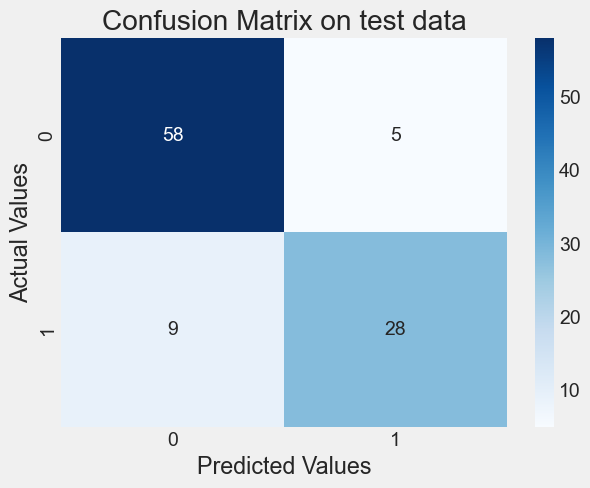

In [28]:
cm=confusion_matrix(y_test,y_pred_test)
#plt.figure(figsize=(4,4))
plt.title("Confusion Matrix on test data")
sns.heatmap(cm, annot=True,fmt='d', cmap='Blues')
plt.ylabel("Actual Values")
plt.xlabel("Predicted Values")

In [29]:
from sklearn.metrics import accuracy_score
print("Accuracy:", accuracy_score(y_test, y_pred_test))
from sklearn.metrics import precision_score
print("Precision:", precision_score(y_test, y_pred_test))
from sklearn.metrics import recall_score
print("Recall:", recall_score(y_test, y_pred_test))
from sklearn.metrics import f1_score
print("F1 score:",  f1_score(y_test, y_pred_test))

Accuracy: 0.86
Precision: 0.8484848484848485
Recall: 0.7567567567567568
F1 score: 0.8


### Changing the default threshold

In [30]:
new_threshold = 0.3

In [31]:
predicted_classes_new_threshold = (y_pred_probs > new_threshold).astype(int)
predicted_classes_new_threshold[:5]

array([[1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0]])

In [32]:
confusion_mat_new_threshold = confusion_matrix(y_test, predicted_classes_new_threshold[:, 1])
print("Confusion Matrix (Threshold =", new_threshold, "):")
print(confusion_mat_new_threshold)
from sklearn.metrics import accuracy_score
print("Accuracy:", accuracy_score(y_test, predicted_classes_new_threshold[:, 1]))
from sklearn.metrics import precision_score
print("Precision:", precision_score(y_test, predicted_classes_new_threshold[:, 1]))
from sklearn.metrics import recall_score
print("Recall:", recall_score(y_test, predicted_classes_new_threshold[:, 1]))
from sklearn.metrics import f1_score
print("F1 score:",  f1_score(y_test, predicted_classes_new_threshold[:, 1]))

Confusion Matrix (Threshold = 0.3 ):
[[44 19]
 [ 7 30]]
Accuracy: 0.74
Precision: 0.6122448979591837
Recall: 0.8108108108108109
F1 score: 0.6976744186046512


## Performance Measurement

We have already seen the confusion matrix, and classification accuracy. Now, let us see some other useful performance metrics that can be computed from the confusion matrix. The metrics below are computed for the confusion matrix immediately above this section *(or the confusion matrix on test data corresponding to the model `logit_model_diabetes`)*.

### Precision-recall

**Precision** measures the accuracy of positive predictions. Also called the `precision` of the classifier 

$$\textrm{precision} = \frac{\textrm{True Positives}}{\textrm{True Positives} + \textrm{False Positives}}$$

==> `70.13%`

`Precision` is typically used with `recall` (`Sensitivity` or `True Positive Rate`). The ratio of positive instances that are correctly detected by the classifier.

$\textrm{recall} = \frac{\textrm{True Positives}}{\textrm{True Positives} + \textrm{False Negatives}}$ ==> `88.52%`

**Precision / Recall Tradeoff**: Increasing precision reduces recall and vice versa.

**Visualize the precision-recall curve for the model `logit_model_diabetes`**.

In [36]:
train

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15755018,Male,36,33000,0
1,15697020,Female,39,61000,0
2,15796351,Male,36,118000,1
3,15665760,Male,39,122000,1
4,15794661,Female,26,118000,0
...,...,...,...,...,...
295,15724536,Female,48,96000,1
296,15701537,Male,42,149000,1
297,15807481,Male,28,79000,0
298,15603942,Female,51,134000,0


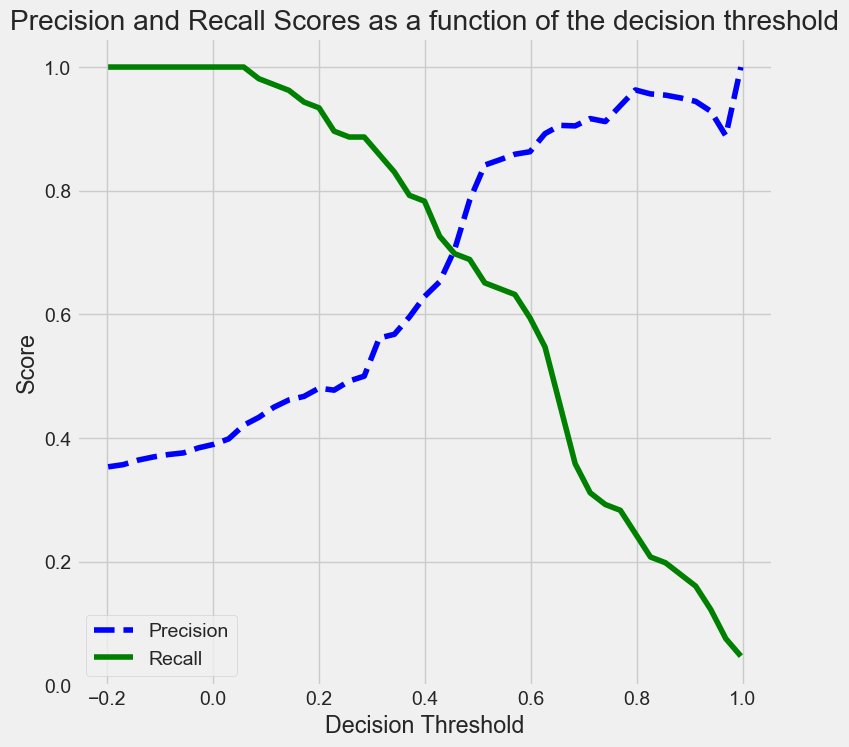

In [39]:
y=train.Purchased
ypred = lm.predict(train)
p, r, thresholds = precision_recall_curve(y, ypred)
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.figure(figsize=(8, 8))
    plt.title("Precision and Recall Scores as a function of the decision threshold")
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.ylabel("Score")
    plt.xlabel("Decision Threshold")
    plt.legend(loc='best')
    plt.legend()
plot_precision_recall_vs_threshold(p, r, thresholds)

As the decision threshold probability increases, the precision increases, while the recall decreases.

**Q:** How are the values of the `thresholds` chosen to make the precision-recall curve?

**Hint:** Look at the documentation for [`precision_recall_curve`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_recall_curve.html).

### The Receiver Operating Characteristics (ROC) Curve

A **ROC(Receiver Operator Characteristic Curve)** is a plot of sensitivity (True Positive Rate) on the y axis against (1−specificity) (False Positive Rate) on the x axis for varying values of the threshold t. The 45° diagonal line connecting (0,0) to (1,1) is the ROC curve corresponding to random chance. The ROC curve for the gold standard is the line connecting (0,0) to (0,1) and (0,1) to (1,1).

In [40]:
#| echo: false

# import image module
from IPython.display import Image

# get the image
Image(url="./Datasets/ROC_AUC.png")

In [41]:
#| echo: false

# import image module
from IPython.display import Image

# get the image
Image(url="./Datasets/ROC_dynamic.gif")

An animation to demonstrate how an ROC curve relates to sensitivity and specificity for all possible cutoffs ([Source](https://github.com/dariyasydykova/open_projects/blob/master/ROC_animation/animations/ROC.gif))




**High Threshold:**

- High specificity
- Low sensitivity


**Low Threshold**

- Low specificity
- High sensitivity

The area under ROC is called *Area Under the Curve(AUC)*. AUC gives the rate of successful classification by the logistic model. To get a more in-depth idea of what a ROC-AUC curve is and how is it calculated, here is a good blog [link](https://www.analyticsvidhya.com/blog/2020/06/auc-roc-curve-machine-learning/).

Here is good [post](https://developers.google.com/machine-learning/crash-course/classification/roc-and-auc) by google developers on interpreting ROC-AUC, and its advantages / disadvantages.

**Visualize the ROC curve and compute the ROC-AUC for the model `logit_model_diabetes`**.

0.8593901964598327


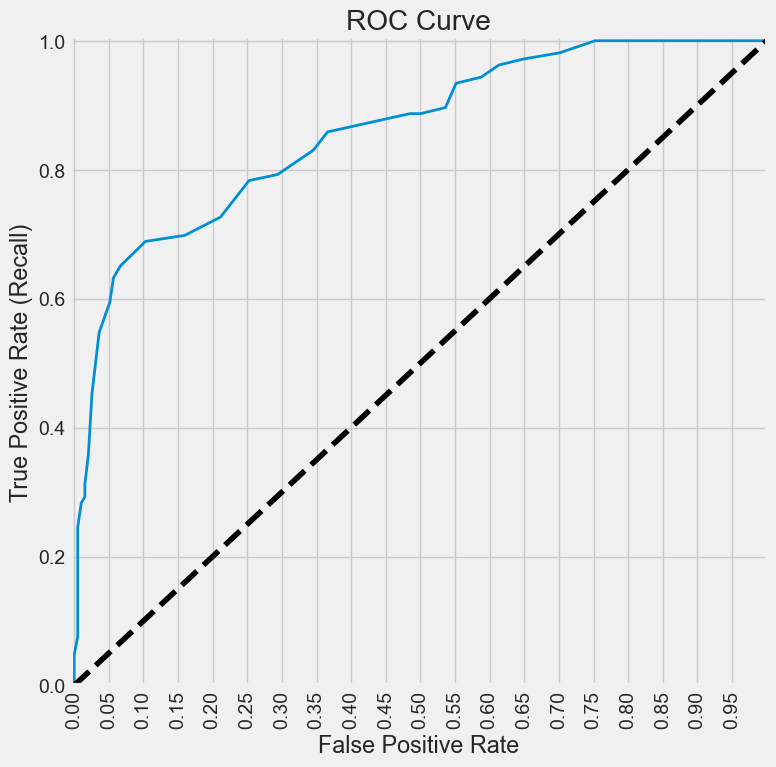

In [42]:
y=train.Purchased
ypred = lm.predict(train)
fpr, tpr, auc_thresholds = roc_curve(y, ypred)
print(auc(fpr, tpr))# AUC of ROC
def plot_roc_curve(fpr, tpr, label=None):
    plt.figure(figsize=(8,8))
    plt.title('ROC Curve')
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.005, 1, 0, 1.005])
    plt.xticks(np.arange(0,1, 0.05), rotation=90)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate (Recall)")

fpr, tpr, auc_thresholds = roc_curve(y, ypred)
plot_roc_curve(fpr, tpr)

**Q:** How are the values of the `auc_thresholds` chosen to make the ROC curve? Why does it look like a step function?

Below is a function that prints the confusion matrix along with all the performance metrics we discussed above for a given decision threshold probability, on train / test data. Note that ROC-AUC does not depend on a decision threshold probability.

In [43]:
#Function to compute confusion matrix and prediction accuracy on test/train data
def confusion_matrix_data(data,actual_values,model,cutoff=0.5):
#Predict the values using the Logit model
    pred_values = model.predict(data)
# Specify the bins
    bins=np.array([0,cutoff,1])
#Confusion matrix
    cm = np.histogram2d(actual_values, pred_values, bins=bins)[0]
    cm_df = pd.DataFrame(cm)
    cm_df.columns = ['Predicted 0','Predicted 1']
    cm_df = cm_df.rename(index={0: 'Actual 0',1:'Actual 1'})
# Calculate the accuracy
    accuracy = (cm[0,0]+cm[1,1])/cm.sum()
    fnr = (cm[1,0])/(cm[1,0]+cm[1,1])
    precision = (cm[1,1])/(cm[0,1]+cm[1,1])
    fpr = (cm[0,1])/(cm[0,0]+cm[0,1])
    tpr = (cm[1,1])/(cm[1,0]+cm[1,1])
    fpr_roc, tpr_roc, auc_thresholds = roc_curve(actual_values, pred_values)
    auc_value = (auc(fpr_roc, tpr_roc))# AUC of ROC
    sns.heatmap(cm_df, annot=True, cmap='Blues', fmt='g')
    plt.ylabel("Actual Values")
    plt.xlabel("Predicted Values")
    print("Classification accuracy = {:.1%}".format(accuracy))
    print("Precision = {:.1%}".format(precision))
    print("TPR or Recall = {:.1%}".format(tpr))
    print("FNR = {:.1%}".format(fnr))
    print("FPR = {:.1%}".format(fpr))
    print("ROC-AUC = {:.1%}".format(auc_value))

Classification accuracy = 68.2%
Precision = 58.3%
TPR or Recall = 94.6%
FNR = 5.4%
FPR = 52.1%
ROC-AUC = 89.4%


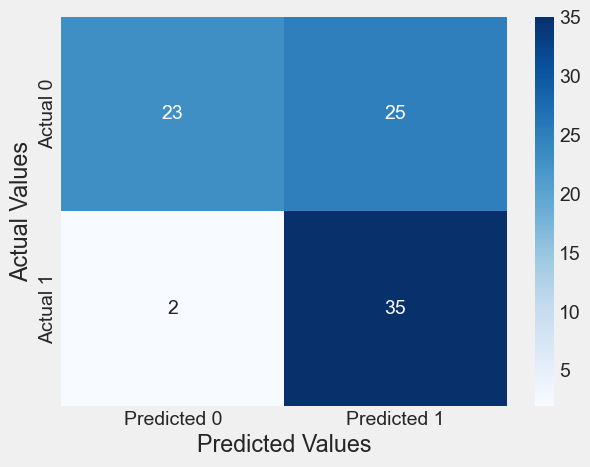

In [45]:
confusion_matrix_data(test,test.Purchased,lm,0.3)

# Precision/Recall Tradeoff

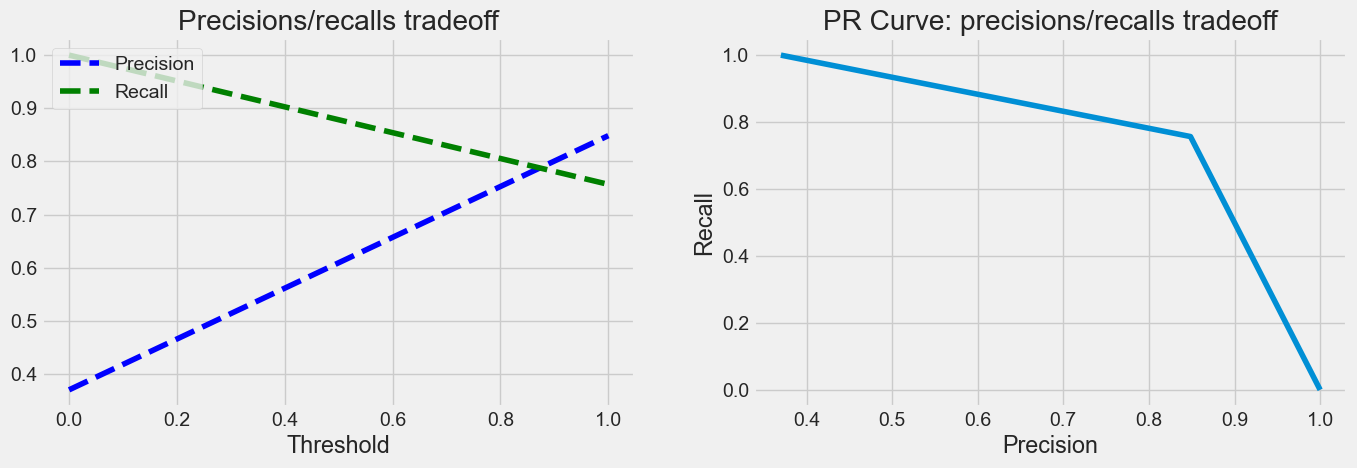

In [46]:
from sklearn.metrics import precision_recall_curve


def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="Recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.title("Precisions/recalls tradeoff")

    
precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_test)


plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 1)
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)

plt.subplot(2, 2, 2)
plt.plot(precisions, recalls)
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.title("PR Curve: precisions/recalls tradeoff");

## The Receiver Operating Characteristics (ROC) Curve

A **ROC(Receiver Operator Characteristic Curve)** is a plot of sensitivity (True Positive Rate) on the y axis against (1−specificity) (False Positive Rate) on the x axis for varying values of the threshold t. The 45° diagonal line connecting (0,0) to (1,1) is the ROC curve corresponding to random chance. The ROC curve for the gold standard is the line connecting (0,0) to (0,1) and (0,1) to (1,1).

![](https://miro.medium.com/max/469/1*Y65IEOXvxLRKKqWxlQovsg.png)

An animation to demonstrate how an ROC curve relates to sensitivity and specificity for all possible cutoffs.

![Alt Text](https://github.com/dariyasydykova/open_projects/blob/master/ROC_animation/animations/ROC.gif?raw=true)

[Source](https://github.com/dariyasydykova/open_projects/blob/master/ROC_animation/animations/ROC.gif)


**High Threshold:**
* High specificity
* Low sensitivity


**Low Threshold**
* Low specificity
* High sensitivity

The area under ROC is called *Area Under the Curve(AUC)*. AUC gives the rate of successful classification by the logistic model. To get a more in-depth idea of what a ROC-AUC curve is and how is it calculated, here is a [link](https://www.analyticsvidhya.com/blog/2020/06/auc-roc-curve-machine-learning/) 

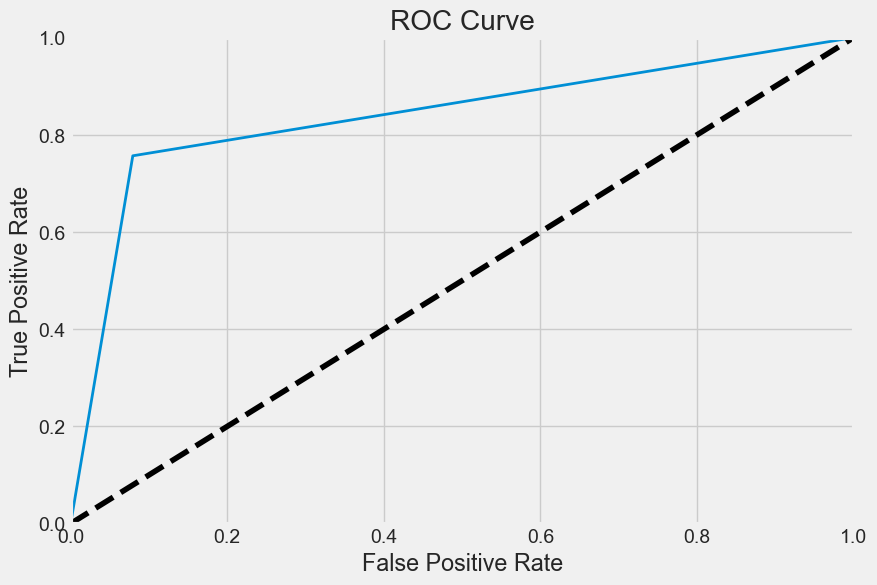

In [47]:
from sklearn.metrics import roc_curve


def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], "k--")
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')

fpr, tpr, thresholds = roc_curve(y_test, y_pred_test)
plt.figure(figsize=(9,6)); 
plot_roc_curve(fpr, tpr)
plt.show();

In [48]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_pred_test)

0.8386958386958387